# Automatyczne odpowiadanie na pytania

<br/>

## dr inż. Aleksander Smywiński-Pohl

## apohllo@agh.edu.pl

## http://apohllo.pl/dydaktyka/nlp

# Plan

* **Wprowadzenie do odpowiadania na pytania (QA)**
* Rodzaje QA
* Ekstraktywne QA
* Selektywne QA
* Abstraktywne QA
* Bezkontekstowe QA

# Test Turinga

&nbsp;

<img src="img/turing-joke.jpg" />


Turing, Alan 1950, "Computing Machinery and Intelligence", Mind, LIX (236): 433–460

# Jeopardy i Watson

&nbsp;

<center>
<img src="img/watson.jpg" width="800px"/>
</center>

Watson wygrał Jeopardy w 2011 grając przeciwko Bradowi Rutterowi (5M `$` wygranych) and Kenowi Jenningsowi (74 wygrane z rzędzu, 4,5M`$` wygranych).

# Struktura problemu QA

* przeszukiwania tekstów - selective question answering
* formułowanie odpowiedzi - extractvie/abstractive question answering

# Plan

* Wprowadzenie do odpowiadania na pytania (QA)
* **Rodzaje QA**
* Ekstraktywne QA
* Selektywne QA
* Abstraktywne QA

# Selective QA/Passage retrieval

* zależy mocno od domeny problemu:
  * Jeopardy - Wikipedia
  * wyszukiwanie artykułów naukowych
  * wyszukiwanie przepisów prawa
  * wyszukiwanie orzeczeń

* różne możliwe podejścia
  * FTS + model neuronalny
  * tylko model neuronalny
  * model neuronalny x 2

* kluczem jest szybkość wyszukiwania
  * ElasticSearch + NBoost
  * FAISS, Milvus, etc.

# Extractive QA

&nbsp;

<img src="img/squad.png" />

# Abstractive QA

PolEval 2021, task 4

**Q**: W jakim zespole występowała Hanka w filmie „Żona dla Australijczyka”? <br/>
**C**: ... Państwowy Zespół Ludowy Pieśni i Tańca  "Mazowsze" ... <br/>
**A**: w Mazowszu <br/>


# Closed-book QA

GPT-style

# In-context learning

GPT-style few-shot

# Plan

* Wprowadzenie do odpowiadania na pytania (QA)
* Rodzaje QA
* **Ekstraktywne QA**
* Selektywne QA
* Abstraktywne QA
* Bezkontekstowe QA

# Ekstraktywne odpowiadanie na pytania

&nbsp;


<img src="img/squad.png" />

# Ekstraktywne odpowiadanie na pytania

&nbsp;


<center>
<img src="img/squad-question.png" />
</center>

<center>
<img src="img/squad-text.png" />
</center>

# BERT

<center>
<img src="img/bert-arch.png" />
</center>

<tiny>
    <em>BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding</em>,
Jacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova
    </tiny>

$$
S \in {\rm I\!R}^{H}, E \in {\rm I\!R}^{H}, 
$$

$$
P_i = \frac{e^{S\cdot T_i}}{\sum_j e^{S\cdot T_j}}
$$

$$
P_i = \frac{e^{E\cdot T_i}}{\sum_j e^{E\cdot T_j}}
$$

Na wyjściu jest wektor reprezentujący osadzenie pierwszego i ostatniego tokenu należącego do odpowiedzi. Maksymalizowany jest iloczyn skalarny tego 
wektora i wektora, który był przewidywany przez sieć. W przypadku SQuAD 2.0, jeśli nie ma odpowiedzi to jako token  początku i końca brany jest token`CLS`.

# BERT - wyniki

<center>
<img src="img/bert-squad-1.png" width="700px" />
</center>

# &nbsp;

<center>
<img src="img/bert-squad-2.png" width="700px" />
</center>

# Aktualny leaderboard

<center>
<img src="img/sota-01.2022.png" />
</center>


https://rajpurkar.github.io/SQuAD-explorer/

# PoQuAD

* Zbiór stworzony na podobieństwo zbioru SQuAD

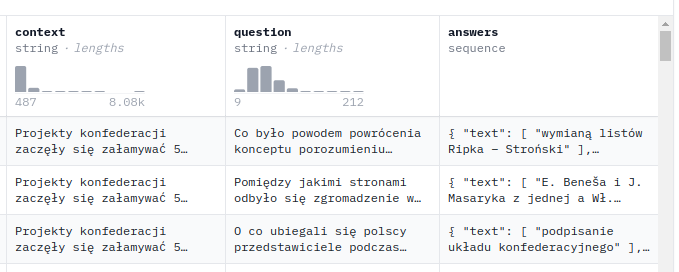

# Plan

* Wprowadzenie do odpowiadania na pytania (QA)
* Rodzaje QA
* Ekstraktywne QA
* **Selektywne QA**
* Abstraktywne QA
* Bezkontekstowe QA

# Selektywne odpowiadanie na pytania

* SOLR/ElasticSearch
* ORQA
* REALM
* Dense Passage Retriver
* Atlas

# Zbiory danych

* NQ - natural questions, pytania użytkowników Google
* WQ - web questions, Google Suggest API
* CT - curated Trec, MSNSearch, AskJeeves
* TriviaQA - pytania konkursowe
* BeIR - multi-zbiór agregujący inne zbiory

# Natural questions

&nbsp;

<center><img src="img/nq-description.png"/></center>

# Natural questions - long and short answers

&nbsp;

<center><img src="img/nq-long.png"/></center>

&nbsp;

<center><img src="img/nq-short.png"/></center>

# Założenia odpowiadania selektywnego

* wybór 10-1000 wyników spośród milionów dostępnych dokumentów
* wysoka szybkość działania (10-100ms dla zbiorów zawierających miliony dokumentów)

# Inverse Cloze Task - ORQA

&nbsp;

<em>
In ICT, a sentence is treated as a pseudoquestion, and its context is treated as pseudoevidence. Given a pseudo-question, ICT requires selecting the corresponding pseudo-evidence out of the candidates in a batch.
</em>

&nbsp;

<center><img src="img/ict.png"/></center>

Kenton Lee, Ming-Wei Chang, and Kristina Toutanova. *Latent retrieval for weakly supervised open
domain question answering*. In Proceedings of the 57th Annual Meeting of the Association for
Computational Linguistics (ACL), July 2019.

# ORQA - wyniki

<img src="img/orqa.png" width="600px"/>

<img src="img/orqa-plot.png"  width="600px"/>

# REALM -  Retrieval-Augmented Language Model Pre-Training (Google)


&nbsp;

<center><img src="img/realm.png"/></center>

# REALM

&nbsp;

<em>
    For both pre-training and fine-tuning, REALM takes some
input x and learns a distribution p(y | x) over possible outputs y. For pre-training, the task is masked language modeling: x is a sentence from a pre-training corpus X with
some tokens masked out, and the model must predict the
value of those missing tokens, y. For fine-tuning, the task
is Open-QA: x is a question, and y is the answer.
    </em>

* **pre-trening** - uczony jest MLM, który wspomaga się fragmentami tekstu z korpusu
* **fine-tuning** - model odpowiadający na pytania, na podstawie znalezionych fragmentów

$$
p(y|x)
$$

* pre-training: $x$ - zdanie, $y$ - zamaskowany token

* fine-tuning: $x$ - pytanie, $y$ - odpowiedź

# Pre-training

&nbsp;

<center><img src="img/realm-pipe.png"/></center>

# Pre-training

$Z$ - zbiór dokumentów $z$, które pomagaja odgadnąć token ($|Z|$ - miliony dokumentów)

$p(z|x)$ - określenie *przydatnych* dokumentów

$p(y|x,z)$ - odgadnięcie najbardziej prawdopodobnych zamaskowanych wyrazów na podstawie zdania $x$ i dokumentu $z$

$$
p(y|x) = \sum_{z \in Z}p(y|x,z)p(z|x)
$$

# Knowledge retriver

$$
p(z|x) = \frac{\text{exp} f(x,z)}{\sum_{z'}\text{exp} f(x,z')}
$$

$$
f(x,z) = E_{I}(x)^{T}E_{D}(z)
$$

$$
\text{join}_{B}(x) = \text{[CLS]}x\text{[SEP]}
$$

$$
\text{join}_{B}(x_1,x_2) = \text{[CLS]}x_1\text{[SEP]}x_2\text{[SEP]}
$$

$$
E_{I}(x) = W_{I}B_{\text{CLS}}(\text{join}_{B}(x))
$$

$$
E_{D}(z) = W_{D}B_{\text{CLS}}(\text{join}_{B}(z_{\text{title}}, z_{\text{body}}))
$$

* $join_B$ - sposób tworzenia osadzenia dla danych wejścowych (jedno lub dwa zdania)
* $E_I$ - osadzenie dla zapytania
* $W_I$ - macierz (warstwa w pełni połączona redukująca wymiarowość)
* $B_{CLS}$- reprezentacja *BERT-a* dla tokenu `CLS` ("pooling representation")
* $E_D$ - osadzenie dla dokumentu (analogicznie $W_D$)

# Knowledge augumented encoder

$$
p(y|x,z) = \Pi_{j=1}^{J_x}p(y_j|x,z)
$$

$$
p(y_j|x,z) \propto \text{exp}\left(w_j^{T}B_{\text{MASK}(j)}(\text{join}_{B}(x,z_{\text{body}}))\right)
$$

$$
p(y|x,z) \propto \sum_{s\in S(z,y)}\text{exp}\left(\text{MLP}\left([h_{\text{start(s)}};h_{\text{end(s)}}]\right)\right)
$$

$$
h_{\text{start(s)}} = B_{\text{start(s)}}(\text{join}_{B}(x,z_{\text{body}}))
$$

$$
h_{\text{end(s)}} = B_{\text{end(s)}}(\text{join}_{B}(x,z_{\text{body}}))
$$

# Trening

* podstawowy problem - obliczenie $p(y|x) = \sum_{z\in Z}p(y|x,z)p(z|x) \rightarrow$ ogranicznie do top-k dokumentów

* użycie algorytmu MIPS do znalezienia top-k dokumentów


* wymaga to obliczenia $E_{D}(z)$ dla wszystkich dokumentów w zbiorze $\rightarrow$ asynchroniczna aktualizacja indeksu, obliczenie nowych osadzeń dla top-k dokumentów

# REALM - wyniki

&nbsp;

<center><img src="img/realm-results.png"/></center>

# REALM - wyniki cd.

&nbsp;

<center><img src="img/realm-ablation.png"/></center>

* salient masking - tylko nazwy własne i daty są maskowane
* span masking - maskowane są następujące po sobie wyrazy

# DPR - Dense Passage Retriver (Facebook)

$E_{P}(\cdot)$ - enokoder dla fragmentów dokumentów (oparty o BERTa)

$E_{Q}(\cdot)$ - enkoder dla pytań  (oparty o BERTa)

$sim(q,p) = E_{Q}(q)^{T}E_{P}(p)$

$E_{P}(\cdot), E_{Q}(\cdot)$ - są osobnymi sieciami opartymi o BERTa (tzn. mają zestaw parametrów trenowanych niezależnie).

# Indeksowanie i inferencja

* dla każdego fragmentu aplikowana jest funkcja $E_{P}(\cdot)$
* fragmenty mają rozmiar 100 wyrazów
* dane składowane są w indeksie FAISS (podobnie jak w przypadku ES/SOLR jest to kosztowna operacja)
* zapytanie jest zamieniane z użyciem funkcji $E_{Q}(\cdot)$
* wyniki wyszukiwane są w czasie sub-liniowym

# Trening modelu

$$
D = \{\langle q_i, p_i^{+}, p_{i,1}^{-}, p_{i,2}^{-}, \cdots, p_{i,n}^{-} \rangle\}^{m}_{i=1}
$$

$$
L(q_i, p_i^{+}, p_{i,1}^{-}, p_{i,2}^{-}, \cdots, p_{i,n}^{-}) = - log \frac{e^{sim(q_i, p_i^{+})}}{e^{sim(q_i, p_i^{+})} + \sum_{j=1}^{n}e^{sim(q_i,p_{i,j}^{-})}} 
$$

Strategie wyboru negatywnych przykładów
* losowa
* BM25
* wybór przykładów z innych odpowiedzi w tym samym batchu (nazywana *gold* w artykule)

# Strategia *gold*


* $Q$, $P$ - macierze $B$ osadzeń dla pytań i fragmentów dokumentów o rozmiarze $B \times d$

* $S = QP^{T}$ - macierz rozmiaru $B \times B$ podobieństwa pytań do fragmentów

* każda para $(q_i, p_j)$ jest pozytywna, jeśli $i=j$, a negatywna w przeciwnym razie

# Wyniki

&nbsp;

<center><img src="img/dpr.png"/></center>

# Strategia wyboru negatywnych przykładów

&nbsp;

<center><img src="img/dpr-strategy.png"/></center>

# Wyniki end-to-end DPR + BERT

&nbsp;

<center><img src="img/dpr-e2e.png"/></center>

* dodać close-book QA
* dodać najnowsze wyniki dla passage retrieval-u
* dodać schemat pokazujący jak dziła pełny pipeline QA

# Plan

* Wprowadzenie do odpowiadania na pytania (QA)
* Rodzaje QA
* Ekstraktywne QA
* Selektywne QA
* **Abstraktywne QA**
* Bezkontekstowe QA

# Ekstraktywne, a abstraktywne QA

* forma fleksyjna odpowiedzi może być inna:
  * Q: W jakim mieście znajduje się Pałac Kultury i Nauki? 
  * A: w Warszawie
  * P: ... Znajduje się w śródmieściu **Warszawy**, przy placu Defilad 1.

* pytania binarne:
  * Q: Czy PKiN znajduje się w Krakowie?
  * A: nie
  * P: ... Znajduje się w śródmieściu **Warszawy**, przy placu Defilad 1.  

* pytania wymagające wielu informacji:
  * Q: Co jest większe: PKiN czy Więża Eiffla?
  * A: Wieża Eiffla
  * P: *PKiN*: Razem ze wspornikiem antenowym, będącym integralną częścią iglicy, ma wysokość **237 metrów**.
  * P: *Wieża Eiffla*: Jej całkowita wysokość zmieniała się kilkukrotnie za sprawą zamocowanej na jej szczycie anteny ... 2000 – **324** m


* ten model może być stosowany do podobnych zadań wymagających dostępu do wiedzy
  * weryfikacja *prawdziwości* stwierdzeń
  * generowanie *pytań* na podstawie odpowiedzi i fragmentu tekstu
  * encjowanie, wikifikacja (entity linking)

# Retrieval-Augmented Generation (RAG, Facebook)

*Our RAG models achieve state-of-the-art results
on open Natural Questions [29], WebQuestions [3] and CuratedTrec [2] and strongly outperform
recent approaches that use specialised pre-training objectives on TriviaQA [24]. Despite these being
extractive tasks, we find that unconstrained generation outperforms previous extractive approaches.*

&nbsp;

<center><img src="img/rag.png"/></center>


Lewis, Patrick, et al. *Retrieval-augmented generation for knowledge-intensive nlp tasks.* arXiv preprint arXiv:2005.11401 (2020).

# Parametry modelu

* $p_{\eta}(z|x)$ - dokumenty $z$ na podstawie zapytania $x$

* $p_{\theta}(y_i|x, z, y_{1:i-1})$ - $i$-ty token odpowiedzi na podstawie zapytania $x$, dokumentu $z$ oraz poprzedzających tokenów

# RAG-sequence

$P_{\textrm{sequence}}(y|x) \approx \sum\limits_{z \in \textrm{top-k}(p(\cdot|x))}p_{\eta}(z|x)p_{\theta}(y|x,z) = \sum\limits_{z \in \textrm{top-k}(p(\cdot|x))} p_{\eta}(z|x)\prod\limits_i\limits^N p_{\theta}(y_i|x, z, y_{1:i-1})$

# RAG-token

$P_{\textrm{token}}(y|x) \approx \prod\limits_i\limits^N \sum\limits_{z \in \textrm{top-k}(p(\cdot|x))} p_{\eta}(z|x)p_{\theta}(y_i|x, z, y_{1:i-1})$

# Elementy modelu

* retriever ($p_{\eta}$) - DPR, Maximum Inner Product Search (MIPS)

* generator ($p_{\theta})$ - BART-large

# Uczenie i predykcja

* w założeniu uczenie jest end-to-end (czyli wszystkie parametry), ale...

* uczenie encodera dla dokumentów (BERT$_{d}$) byłoby czasochłonne, więc on nie jest uczony

* uczeniu podlega encoder dla zapytań (BERT$_q$) oraz generator BART

* predykcja wymaga specjalnego podejścia do modelu RAG-sequence
  * dla jednego dokumentu mogą pojawić się inne tokeny niż dla innego - trzeba je też uwzględnić przy ocenie prawdopodobieństwa

# Eksperymenty

* Natural Questions, TriviaQA, WebQuestions, CuratedTrec - extractive open domain QA
* MSMARCO - abstractive QA
* Jeopardy (SearchQA) - generowanie "pytania":
  * In 1986 Mexico scored as the first country to host this international sports competition twice. $\rightarrow$ World Cup
* Fever - weryfikacja faktów: prawdziwe, fałszywe, nieweryfikowalne
 

# RAG wyniki

&nbsp;

<center><img src="img/rag-results.png"/></center>


# WebGPT

&nbsp;

<center><img src="img/webgpt-actions.png"/></center>

Nakano, Reiichiro, et al. *WebGPT: Browser-assisted question-answering with human feedback.* arXiv preprint arXiv:2112.09332 (2021).

# WebGPT

&nbsp;

<center><img src="img/webgpt-results-1.png"/></center>

# WebGPT

&nbsp;

<center><img src="img/webgpt-results.png"/></center>

# Atlas: Few-shot Learning with Retrieval Augmented Language Models

* attention distillation
* kilka różnych metod uczenia (wygrywa maskowany model języka)
* efektywna aktualizacja indeksu dokumentów (Query-side fine-tuning)

# Attention distillation

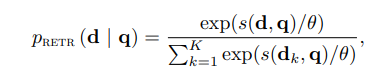

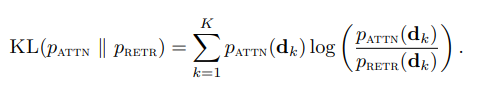

&nbsp;

<center><img src="img/atlas-results.png"/></center>

## Bezkontekstowe QA


* zero/few-shot learning
* in-context learning

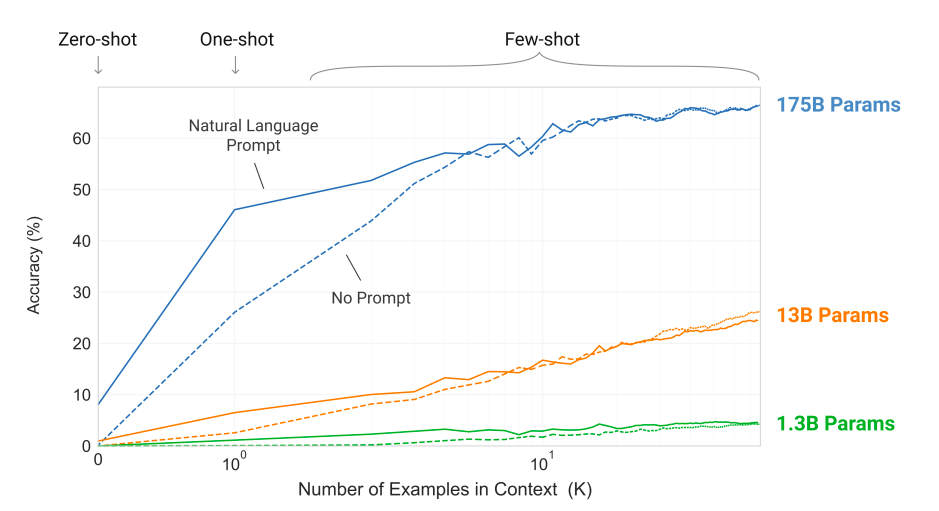

## Chain-of-thought

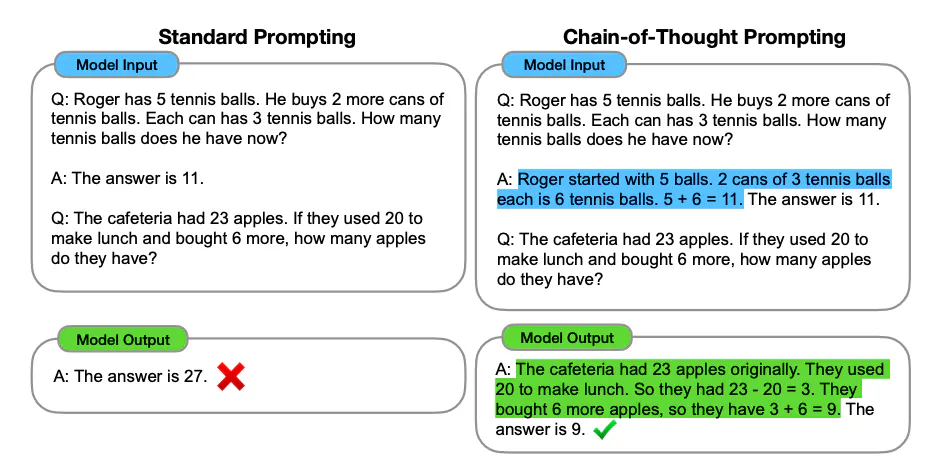

*Chain-of-Thought Prompting Elicits Reasoning in Large Language Models*, Jason Wei et al. 2022

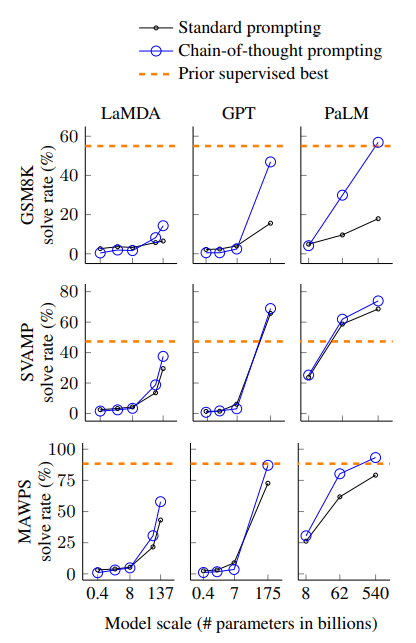

## Let's think step-by-step

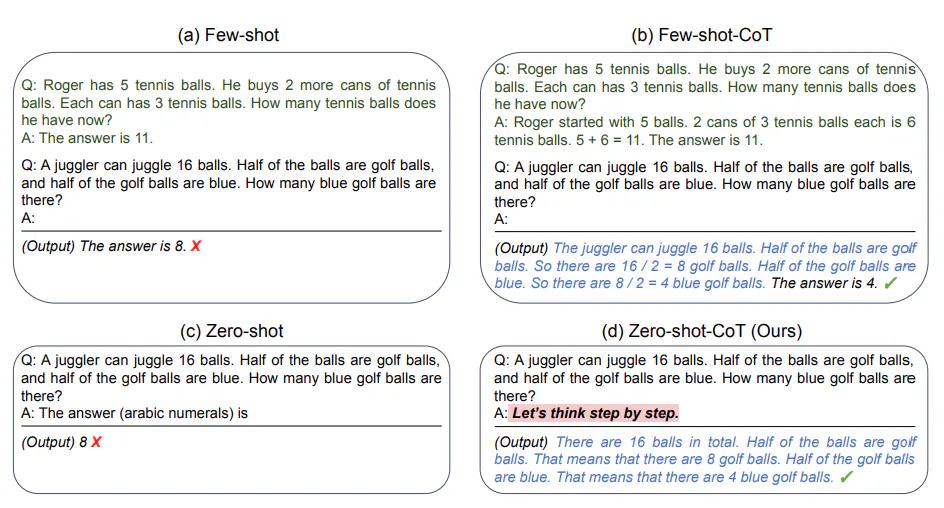

*Large Language Models are Zero-Shot Reasoners*, Takeshi Kojima et al. 2022

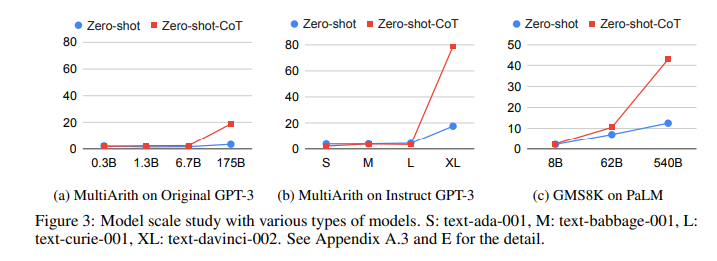

## Automatic Chain-of-Thought

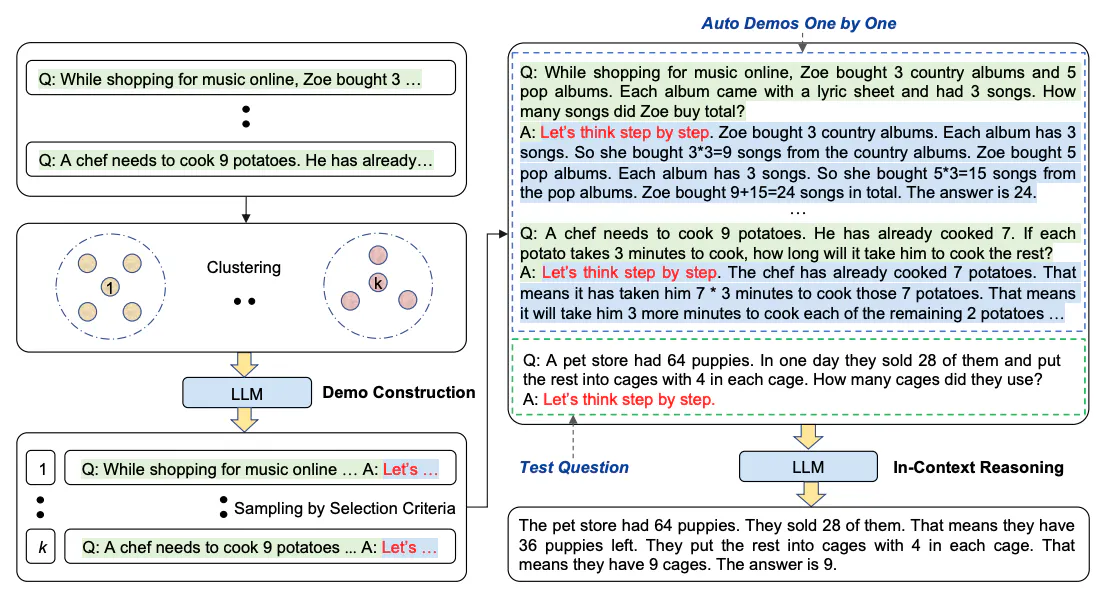

*Automatic Chain of Thought Prompting in Large Language Models*, Zhuosheng Zhang et al. 2022

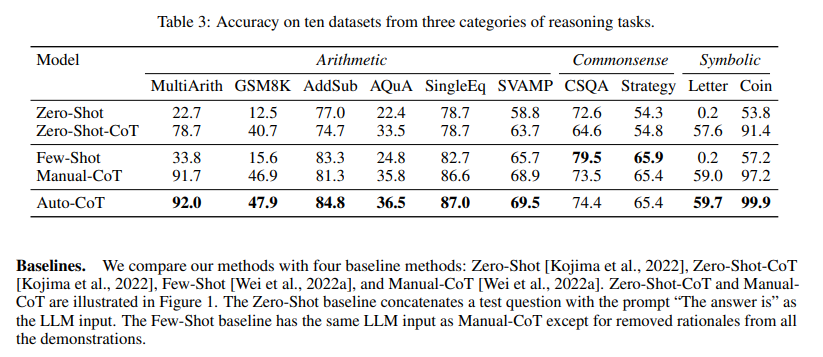

# Literatura

* Vaswani, Ashish, et al. [Attention is all you need.](https://arxiv.org/abs/1706.03762) Advances in neural information processing systems. 2017.
* Devlin, Jacob, et al. [Bert: Pre-training of deep bidirectional transformers for language understanding.](https://arxiv.org/abs/1810.04805) arXiv preprint arXiv:1810.04805 (2018).
* [The Illustrated transformer](http://jalammar.github.io/illustrated-transformer/)
* [The Illustrated BERT](http://jalammar.github.io/illustrated-bert/)
* [REALM: Retrieval-Augmented Language Model Pre-Training](https://arxiv.org/pdf/2002.08909.pdf)
* [Dense Passage Retriver](https://arxiv.org/pdf/2004.04906.pdf)
* [Rozdział 9 SLP](https://web.stanford.edu/~jurafsky/slp3/9.pdf)